<header style="width:100%;position:relative">
  <div style="width:80%;float:right;">
    <h1>Challenge Loan Approval Prediction in Pennsylvania</h1>
    <h3>Model evaluation</h3>
    <h5>Grupo 2</h5>
  </div>
        <img style="width:15%;" src="./images/logo.jpg" alt="UPM" />
</header>

## Table of Contents
1. [Introduction](#1.-Introduction)
   - 1.1 Project Overview
   - 1.2 Dataset Description
   - 1.3 Methodology

2. [Environment Setup](#2.-Environment-Setup)
   - 2.1 Required Libraries
   - 2.2 Utility Functions

3. [Data Loading and Initial Analysis](#3.-Data-Loading-and-Initial-Analysis)
   - 3.1 Data Loading
   - 3.2 Data Overview
   - 3.3 Feature Analysis
   - 3.4 Class Distribution Analysis

4. [Data Preprocessing](#4.-Data-Preprocessing)
   - 4.1 Feature Selection
   - 4.2 Data Type Verification
   - 4.3 Feature Scaling
   - 4.4 Data Quality Check

5. [Handling Class Imbalance](#5.-Handling-Class-Imbalance)
   - 5.1 SMOTE Overview
   - 5.2 SMOTE Application
   - 5.3 Post-SMOTE Distribution Analysis

6. [Dimensionality Reduction](#6.-Dimensionality-Reduction)
   - 6.1 PCA Overview
   - 6.2 Variance Analysis
   - 6.3 Component Selection
   - 6.4 PCA Application

7. [Model Preparation](#7.-Model-Preparation)
   - 7.1 Cross-Validation Strategy
   - 7.2 Evaluation Metrics
   - 7.3 Model Selection and Parameters

8. [Model Training and Evaluation](#8.-Model-Training-and-Evaluation)

9. [Results Analysis](#9.-Results-Analysis)
   - 9.1 Performance Metrics Comparison
   - 9.2 Confusion Matrix Analysis
   - 9.3 Model Selection
   - 9.4 Performance Visualization

10. [Conclusions](#10.-Conclusions)
    - 10.1 Best Model Analysis
    - 10.2 Recommendations
    - 10.3 Future Improvements

## 1. Introduction

### 1.1 Project Overview

This notebook implements a comprehensive machine learning pipeline for predicting loan acceptance based on various features. The project aims to:
- Develop accurate prediction models for loan acceptance
- Compare different machine learning algorithms
- Handle class imbalance in the dataset
- Provide insights into feature importance

### 1.2 Dataset Description

The dataset (`train_exportado.csv`) contains loan application information with the following characteristics:
- Multiple features including approval dates, employee numbers, job creation metrics
- Binary and categorical variables
- Target variable: 'Accept' (loan acceptance status)
- Preprocessed features with various encoding schemes

### 1.3 Methodology

Our approach follows these key steps:
1. **Data Preprocessing**:
   - Feature selection and scaling
   - Handling class imbalance using SMOTE
   - Dimensionality reduction using PCA

2. **Model Evaluation**:
   - Implementation of multiple classifiers
   - 5-fold cross-validation
   - Performance metrics: F1-score, ROC AUC

3. **Results Analysis**:
   - Comparison of model performances
   - Confusion matrix analysis
   - Best model selection

## 2. Environment Setup

### 2.1 Required Libraries

We import necessary Python libraries for our analysis:
- **Data manipulation**: pandas, numpy
- **Machine Learning**: scikit-learn
- **Imbalanced Learning**: imblearn
- **Visualization**: matplotlib
- **Utility**: time (for performance monitoring)

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, f1_score, make_scorer

# Imbalanced learning
from imblearn.over_sampling import SMOTE

# Visualization
import matplotlib.pyplot as plt

# Utility
import time

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

print("All required libraries have been imported successfully.")

All required libraries have been imported successfully.


### 2.2 Utility Functions

We define utility functions to help with our analysis:

1. **Time Logging**: Track execution time of different processes
2. **Visualization Helpers**: Functions for creating consistent plots
3. **Metric Calculation**: Helper functions for performance metrics

In [4]:
def log_time(message, start_time):
    """Log the execution time of a process.
    
    Args:
        message (str): Description of the process
        start_time (float): Process start time
    """
    print(f"{message} - Time taken: {time.time() - start_time:.2f} seconds")

def plot_confusion_matrix(matrix, title):
    """Create a styled confusion matrix plot.
    
    Args:
        matrix (np.array): 2x2 confusion matrix
        title (str): Plot title
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Add text annotations
    thresh = matrix.max() / 2
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(j, i, f'{matrix[i, j]:.2f}',
                    horizontalalignment='center',
                    color='white' if matrix[i, j] > thresh else 'black')

def calculate_metrics(y_true, y_pred):
    """Calculate multiple performance metrics.
    
    Args:
        y_true (np.array): True labels
        y_pred (np.array): Predicted labels
        
    Returns:
        dict: Dictionary of calculated metrics
    """
    return {
        'f1': f1_score(y_true, y_pred),
        'confusion_matrix': confusion_matrix(y_true, y_pred)
    }

print("Utility functions defined successfully.")

Utility functions defined successfully.


## 3. Data Loading and Initial Analysis

### 3.1 Data Loading

We begin by loading our dataset from the formatted CSV file. This step includes:
- Reading the CSV file using pandas
- Initial verification of data loading
- Basic error handling for file access

The data is stored in the 'formated' directory, which contains preprocessed versions of our training data.

In [7]:
print("Loading data...")
start_time = time.time()

try:
    df = pd.read_csv("./formated/train_exportado.csv")
    print("\nData loaded successfully!")
    print(f"Dataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns")
except FileNotFoundError:
    print("Error: Could not find the data file. Please check the path.")
except Exception as e:
    print(f"Error loading data: {str(e)}")

log_time("Data loading process", start_time)

Loading data...

Data loaded successfully!
Dataset dimensions: 22575 rows and 32 columns
Data loading process - Time taken: 0.06 seconds


### 3.2 Data Overview

Let's examine the basic characteristics of our dataset to understand its structure and content.

In [10]:
# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

print("\nFirst few rows of the dataset:")
display(df.head())

print("\nBasic statistical description:")
display(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22575 entries, 0 to 22574
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ApprovalDate                   22575 non-null  int64 
 1   ApprovalFY                     22575 non-null  int64 
 2   NoEmp                          22575 non-null  int64 
 3   CreateJob                      22575 non-null  int64 
 4   RetainedJob                    22575 non-null  int64 
 5   DisbursementDate               22575 non-null  int64 
 6   DisbursementGross              22575 non-null  int64 
 7   Accept                         22575 non-null  int64 
 8   NewExist_Binary                22575 non-null  int64 
 9   Franchise_Binary               22575 non-null  int64 
 10  UrbanRural_Binary              22575 non-null  int64 
 11  RevLineCr_Binary               22575 non-null  int64 
 12  LowDoc_Binary                  22575 n

,ApprovalDate,ApprovalFY,NoEmp,CreateJob,RetainedJob,DisbursementDate,DisbursementGross,Accept,NewExist_Binary,Franchise_Binary,...,CreateJob_Binary,RetainedJob_Binary,DisbursementGross_Grouped,DisbursementGross_Grouped_cod,BankState_DE,BankState_IL,BankState_OH,BankState_Otros,BankState_RI,BankState_Categorized
0,11,2006,2,0,2,12,8000,1,0,0,...,0,1,0-30k,0,0,0,0,0,1,RI
1,6,2005,2,1,2,7,166000,1,0,0,...,1,1,150k-500k,3,0,0,1,0,0,OH
2,3,2003,2,4,2,3,25000,1,0,0,...,1,1,0-30k,0,0,0,1,0,0,OH
3,6,1995,2,0,0,1,220100,1,0,0,...,0,0,150k-500k,3,0,0,1,0,0,OH
4,4,2009,0,0,0,5,25000,0,1,0,...,0,0,0-30k,0,0,0,1,0,0,OH



Basic statistical description:


,ApprovalDate,ApprovalFY,NoEmp,CreateJob,RetainedJob,DisbursementDate,DisbursementGross,Accept,NewExist_Binary,Franchise_Binary,...,ApprovalFY_Grouped_cod,NoEmp_Grouped_cod,CreateJob_Binary,RetainedJob_Binary,DisbursementGross_Grouped_cod,BankState_DE,BankState_IL,BankState_OH,BankState_Otros,BankState_RI
count,22575.000000,22575.000000,22575.000000,22575.000000,22575.000000,22575.000000,2.257500e+04,22575.000000,22575.000000,22575.000000,...,22575.000000,22575.000000,22575.000000,22575.000000,22575.000000,22575.000000,22575.000000,22575.000000,22575.000000,22575.000000
mean,6.433488,2001.604740,12.324474,18.667597,21.153001,6.328283,1.697351e+05,0.831849,0.700952,0.068527,...,5.957076,2.256478,0.313090,0.489125,1.723012,0.058782,0.116323,0.651827,0.096611,0.076456
std,3.384253,6.174926,68.343268,379.291290,379.379297,3.409567,2.496085e+05,0.374008,0.457851,0.252654,...,1.282043,1.189031,0.463761,0.499893,1.204356,0.235221,0.320619,0.476402,0.295434,0.265733
min,1.000000,1970.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+02,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1997.000000,2.000000,0.000000,0.000000,4.000000,4.000000e+04,1.000000,0.000000,0.000000,...,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,2003.000000,5.000000,0.000000,0.000000,6.000000,8.790000e+04,1.000000,1.000000,0.000000,...,6.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,9.000000,2006.000000,12.000000,2.000000,4.000000,9.000000,1.899550e+05,1.000000,1.000000,0.000000,...,7.000000,3.000000,1.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,12.000000,2014.000000,7538.000000,8800.000000,8800.000000,12.000000,4.831510e+06,1.000000,1.000000,1.000000,...,8.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Missing values in each column:
No missing values found


### 3.3 Feature Analysis

We analyze our features to understand their characteristics and relationships. This helps in feature selection and preprocessing decisions.

In [13]:
# Analyze feature types
print("Feature Types:")
print(df.dtypes.value_counts())

# Identify binary, categorical, and numerical features
binary_features = [col for col in df.columns if '_Binary' in col]
categorical_features = [col for col in df.columns if '_Categorized' in col]
coded_features = [col for col in df.columns if '_cod' in col]

print("\nFeature Categories:")
print(f"Binary features: {len(binary_features)}")
print(f"Categorical features: {len(categorical_features)}")
print(f"Coded features: {len(coded_features)}")

# Display unique values in categorical features
print("\nUnique values in categorical features:")
for feature in categorical_features:
    print(f"\n{feature}: {df[feature].nunique()} unique values")
    print(df[feature].value_counts().head())

Feature Types:
int64     27
object     5
Name: count, dtype: int64

Feature Categories:
Binary features: 7
Categorical features: 4
Coded features: 5

Unique values in categorical features:

Bank_Categorized: 13 unique values
Bank_Categorized
Otros                             5000
THE HUNTINGTON NATIONAL BANK      4225
PNC BANK, NATIONAL ASSOCIATION    2883
JPMORGAN CHASE BANK NATL ASSOC    2671
CITIZENS BANK NATL ASSOC          1721
Name: count, dtype: int64

Bank_Categorized_cod: 13 unique values
Bank_Categorized_cod
8     5000
10    4225
9     2883
6     2671
1     1721
Name: count, dtype: int64

BankState_Categorized_cod: 5 unique values
BankState_Categorized_cod
2    14715
1     2626
3     2181
4     1726
0     1327
Name: count, dtype: int64

BankState_Categorized: 5 unique values
BankState_Categorized
OH       14715
IL        2626
Otros     2181
RI        1726
DE        1327
Name: count, dtype: int64


### 3.4 Class Distribution Analysis

We examine the distribution of our target variable ('Accept') to understand class imbalance.

Class Distribution:
Accept
1    0.831849
0    0.168151
Name: proportion, dtype: float64


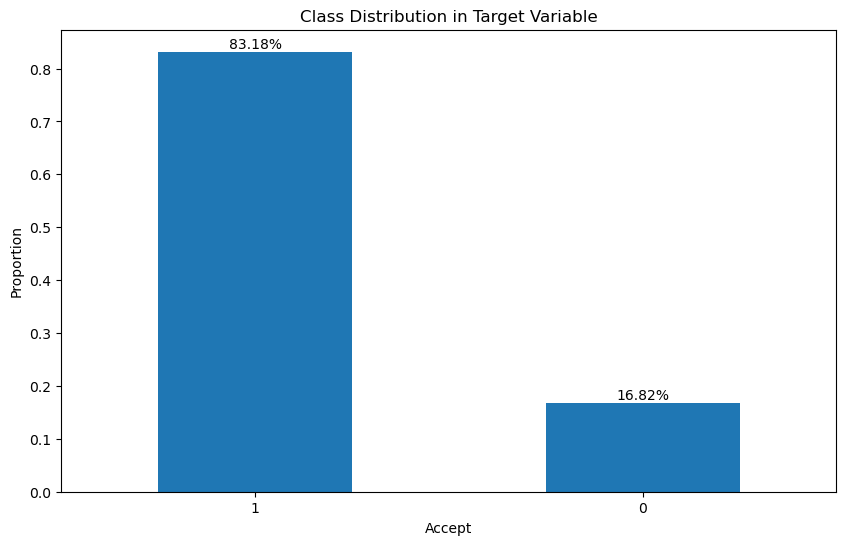


Imbalance ratio: 4.95:1


In [16]:
# Analyze class distribution
class_distribution = df['Accept'].value_counts(normalize=True)

print("Class Distribution:")
print(class_distribution)

# Visualize class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution in Target Variable')
plt.xlabel('Accept')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
for i, v in enumerate(class_distribution):
    plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')
plt.show()

print(f"\nImbalance ratio: {class_distribution.max() / class_distribution.min():.2f}:1")

## 4. Data Preprocessing

### 4.1 Feature Selection

We carefully select features based on our analysis and domain knowledge. This includes:
- Numerical features that are already properly scaled
- Binary features that are properly encoded
- Coded categorical features

We exclude raw categorical features as they've already been encoded in our preprocessed dataset.

In [19]:
# Define our selected features
selected_features = [
    # Numerical features
    'ApprovalFY', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross',
    
    # Binary features
    'NewExist_Binary', 'Franchise_Binary', 'UrbanRural_Binary',
    'RevLineCr_Binary', 'LowDoc_Binary', 'CreateJob_Binary',
    'RetainedJob_Binary',
    
    # Time-related features
    'ApprovalDate_quarter', 'DisbursementDate_quarter',
    
    # Coded categorical features
    'Bank_Categorized_cod', 'BankState_Categorized_cod',
    'ApprovalFY_Grouped_cod', 'NoEmp_Grouped_cod',
    'DisbursementGross_Grouped_cod',
    
    # Bank state indicators
    'BankState_DE', 'BankState_IL', 'BankState_OH',
    'BankState_Otros', 'BankState_RI'
]

print("Selected Features Summary:")
print(f"Total number of features selected: {len(selected_features)}")

# Prepare X and y
X = df[selected_features].values
y = df['Accept'].values

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Selected Features Summary:
Total number of features selected: 24

Feature matrix shape: (22575, 24)
Target vector shape: (22575,)


### 4.2 Data Type Verification

We verify that all our selected features are in the correct format for machine learning algorithms.

In [22]:
# Check data types of selected features
feature_dtypes = df[selected_features].dtypes
print("Feature Data Types:")
print(feature_dtypes)

# Verify no missing values
missing_in_selected = df[selected_features].isnull().sum()
print("\nMissing values in selected features:")
print(missing_in_selected[missing_in_selected > 0] if any(missing_in_selected > 0) else "No missing values")

# Verify numeric conversion
try:
    X.astype(float)
    print("\nAll features successfully converted to numeric type")
except ValueError as e:
    print(f"\nError in numeric conversion: {str(e)}")

Feature Data Types:
ApprovalFY                       int64
NoEmp                            int64
CreateJob                        int64
RetainedJob                      int64
DisbursementGross                int64
NewExist_Binary                  int64
Franchise_Binary                 int64
UrbanRural_Binary                int64
RevLineCr_Binary                 int64
LowDoc_Binary                    int64
CreateJob_Binary                 int64
RetainedJob_Binary               int64
ApprovalDate_quarter             int64
DisbursementDate_quarter         int64
Bank_Categorized_cod             int64
BankState_Categorized_cod        int64
ApprovalFY_Grouped_cod           int64
NoEmp_Grouped_cod                int64
DisbursementGross_Grouped_cod    int64
BankState_DE                     int64
BankState_IL                     int64
BankState_OH                     int64
BankState_Otros                  int64
BankState_RI                     int64
dtype: object

Missing values in selected fe

### 4.3 Feature Scaling

We apply StandardScaler to normalize our features. This is crucial because:
- It ensures all features are on the same scale
- It improves the performance of many ML algorithms
- It's particularly important for distance-based algorithms and neural networks

In [25]:
print("Applying StandardScaler...")
start_time = time.time()

# Initialize and apply the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verify scaling results
print("\nScaling verification:")
print(f"Mean of scaled features: {X_scaled.mean(axis=0)[:5]}... (first 5 features)")
print(f"Std of scaled features: {X_scaled.std(axis=0)[:5]}... (first 5 features)")

log_time("Scaling completed", start_time)

Applying StandardScaler...

Scaling verification:
Mean of scaled features: [-1.16171770e-14 -1.03866712e-17 -6.29495225e-19 -1.71537449e-17
 -2.23470805e-17]... (first 5 features)
Std of scaled features: [1. 1. 1. 1. 1.]... (first 5 features)
Scaling completed - Time taken: 0.01 seconds


### 4.4 Data Quality Check

Final verification of our preprocessed data to ensure it's ready for modeling.

In [28]:
# Comprehensive data quality checks
print("Data Quality Check:")

# Check for infinite values
inf_check = np.isinf(X_scaled).sum()
print(f"Infinite values: {inf_check}")

# Check for NaN values
nan_check = np.isnan(X_scaled).sum()
print(f"NaN values: {nan_check}")

# Verify shape consistency
print(f"\nShape verification:")
print(f"X_scaled shape: {X_scaled.shape}")
print(f"y shape: {y.shape}")

# Basic statistical check
print("\nBasic statistics of scaled features:")
print(f"Min values: {X_scaled.min(axis=0)[:5]}... (first 5 features)")
print(f"Max values: {X_scaled.max(axis=0)[:5]}... (first 5 features)")

print("\nPreprocessing completed successfully!")

Data Quality Check:
Infinite values: 0
NaN values: 0

Shape verification:
X_scaled shape: (22575, 24)
y shape: (22575,)

Basic statistics of scaled features:
Min values: [-5.1183512  -0.18033593 -0.04921814 -0.0557581  -0.67961989]... (first 5 features)
Max values: [  2.00739812 110.11826695  23.15246125  23.14053906  18.67676092]... (first 5 features)

Preprocessing completed successfully!


## 5. Handling Class Imbalance

### 5.1 SMOTE Overview

Synthetic Minority Over-sampling Technique (SMOTE) is used to address class imbalance by:
- Creating synthetic examples of the minority class
- Generating new instances between existing minority class samples
- Helping prevent overfitting that can occur with simple oversampling

This is crucial for our dataset where loan acceptance rates may be imbalanced.

Original class distribution:
1    0.831849
0    0.168151
Name: proportion, dtype: float64


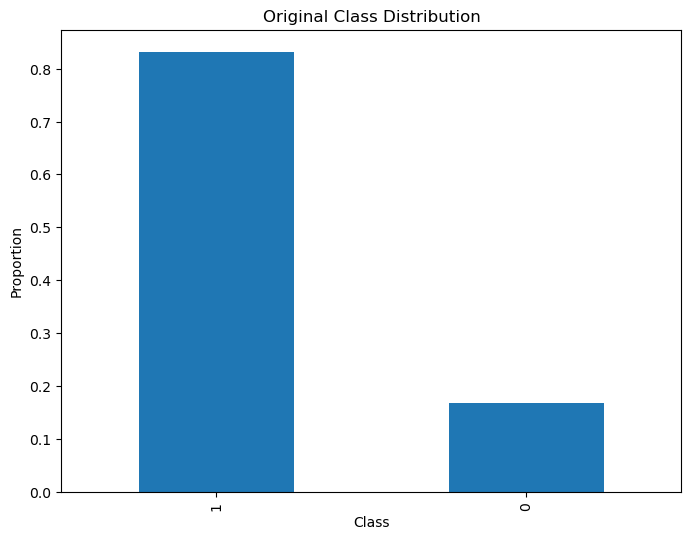

In [31]:
# Display original class distribution
print("Original class distribution:")
original_dist = pd.Series(y).value_counts(normalize=True)
print(original_dist)

# Visualize original distribution
plt.figure(figsize=(8, 6))
original_dist.plot(kind='bar')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.show()

### 5.2 SMOTE Application

We apply SMOTE to balance our dataset. This process involves:
1. Initializing SMOTE with appropriate parameters
2. Applying it to our scaled features
3. Verifying the resampling results

In [34]:
print("Applying SMOTE...")
start_time = time.time()

# Initialize and apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Verify resampling results
print("\nShape after SMOTE:")
print(f"X shape: {X_resampled.shape}")
print(f"y shape: {y_resampled.shape}")

log_time("SMOTE completed", start_time)

Applying SMOTE...

Shape after SMOTE:
X shape: (37558, 24)
y shape: (37558,)
SMOTE completed - Time taken: 0.09 seconds


### 5.3 Post-SMOTE Distribution Analysis

We analyze the results of SMOTE to ensure proper class balance.


Class distribution after SMOTE:
1    0.5
0    0.5
Name: proportion, dtype: float64


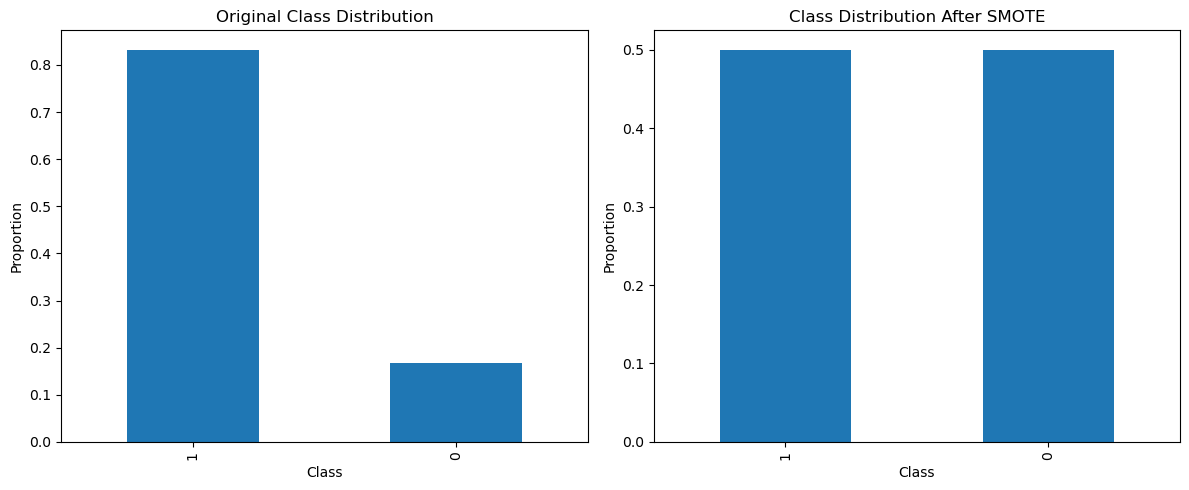

In [37]:
# Analyze new class distribution
resampled_dist = pd.Series(y_resampled).value_counts(normalize=True)
print("\nClass distribution after SMOTE:")
print(resampled_dist)

# Visualize comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
original_dist.plot(kind='bar')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Proportion')

plt.subplot(1, 2, 2)
resampled_dist.plot(kind='bar')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()

## 6. Dimensionality Reduction

### 6.1 PCA Overview

Principal Component Analysis (PCA) is used to:
- Reduce the dimensionality of our dataset
- Preserve the most important patterns in the data
- Improve model training efficiency
- Handle potential multicollinearity

### 6.2 Variance Analysis

We analyze the explained variance ratio to determine the optimal number of components.

Applying PCA...


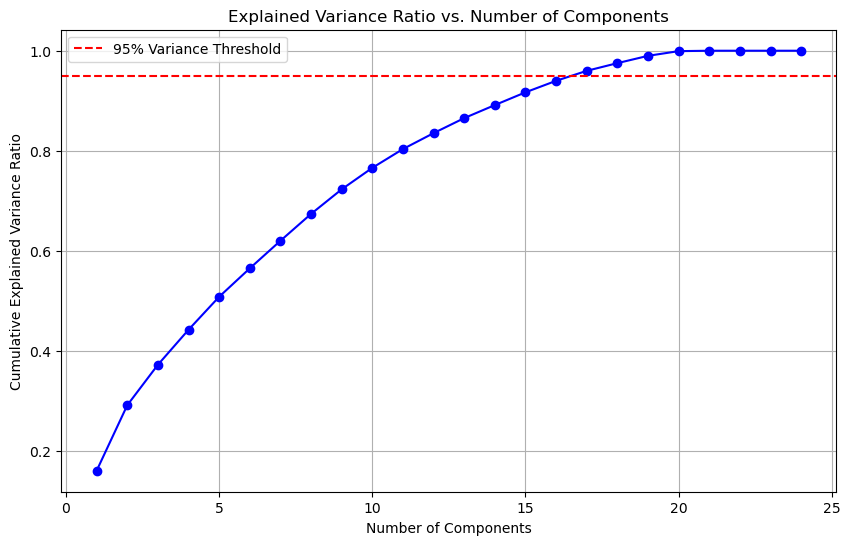

PCA analysis completed - Time taken: 0.13 seconds


In [41]:
print("Applying PCA...")
start_time = time.time()

# Initialize and fit PCA
pca = PCA()
X_pca_full = pca.fit_transform(X_resampled)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), 
         cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)

# Add threshold line
plt.axhline(y=0.95, color='r', linestyle='--', 
            label='95% Variance Threshold')
plt.legend()
plt.show()

log_time("PCA analysis completed", start_time)

### 6.3 Component Selection

Based on the variance analysis, we select the optimal number of components that explain 95% of the variance.

In [44]:
# Find number of components for 95% variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"Number of components selected: {n_components}")
print(f"Explained variance with {n_components} components: "
      f"{cumulative_variance_ratio[n_components-1]:.4f}")

# Display variance explained by each component
print("\nVariance explained by each component:")
for i, var in enumerate(pca.explained_variance_ratio_[:n_components]):
    print(f"Component {i+1}: {var:.4f} ({var*100:.2f}%)")

Number of components selected: 17
Explained variance with 17 components: 0.9598

Variance explained by each component:
Component 1: 0.1607 (16.07%)
Component 2: 0.1309 (13.09%)
Component 3: 0.0809 (8.09%)
Component 4: 0.0700 (7.00%)
Component 5: 0.0659 (6.59%)
Component 6: 0.0568 (5.68%)
Component 7: 0.0551 (5.51%)
Component 8: 0.0537 (5.37%)
Component 9: 0.0491 (4.91%)
Component 10: 0.0429 (4.29%)
Component 11: 0.0375 (3.75%)
Component 12: 0.0318 (3.18%)
Component 13: 0.0300 (3.00%)
Component 14: 0.0261 (2.61%)
Component 15: 0.0255 (2.55%)
Component 16: 0.0230 (2.30%)
Component 17: 0.0200 (2.00%)


### 6.4 PCA Application

We apply PCA with the selected number of components to our dataset.

In [47]:
# Apply PCA with selected number of components
X_pca = X_pca_full[:, :n_components]

print("Final dataset dimensions:")
print(f"Original features: {X_resampled.shape[1]}")
print(f"PCA features: {X_pca.shape[1]}")
print(f"Dimension reduction: {X_resampled.shape[1] - X_pca.shape[1]} features")

# Verify data quality after PCA
print("\nPCA data quality check:")
print(f"NaN values: {np.isnan(X_pca).sum()}")
print(f"Infinite values: {np.isinf(X_pca).sum()}")

print("\nPCA transformation completed successfully!")

Final dataset dimensions:
Original features: 24
PCA features: 17
Dimension reduction: 7 features

PCA data quality check:
NaN values: 0
Infinite values: 0

PCA transformation completed successfully!


## 7. Model Preparation

### 7.1 Cross-Validation Strategy

We implement a robust cross-validation strategy using StratifiedKFold to:
- Maintain class proportions across folds
- Ensure reliable model evaluation
- Prevent overfitting
- Generate stable performance metrics

In [50]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5,  # 5-fold cross-validation
                     shuffle=True,  # Shuffle data before splitting
                     random_state=42)  # For reproducibility

# Verify fold distribution
print("Fold size verification:")
for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X_pca, y_resampled)):
    print(f"\nFold {fold_idx + 1}:")
    print(f"Training set size: {len(train_idx)}")
    print(f"Validation set size: {len(val_idx)}")
    
    # Verify class distribution in each fold
    train_dist = pd.Series(y_resampled[train_idx]).value_counts(normalize=True)
    val_dist = pd.Series(y_resampled[val_idx]).value_counts(normalize=True)
    print(f"Training class distribution: {dict(train_dist)}")
    print(f"Validation class distribution: {dict(val_dist)}")

Fold size verification:

Fold 1:
Training set size: 30046
Validation set size: 7512
Training class distribution: {1: 0.5, 0: 0.5}
Validation class distribution: {1: 0.5, 0: 0.5}

Fold 2:
Training set size: 30046
Validation set size: 7512
Training class distribution: {1: 0.5, 0: 0.5}
Validation class distribution: {1: 0.5, 0: 0.5}

Fold 3:
Training set size: 30046
Validation set size: 7512
Training class distribution: {1: 0.5, 0: 0.5}
Validation class distribution: {1: 0.5, 0: 0.5}

Fold 4:
Training set size: 30047
Validation set size: 7511
Training class distribution: {0: 0.5000166405963989, 1: 0.499983359403601}
Validation class distribution: {1: 0.5000665690320862, 0: 0.4999334309679137}

Fold 5:
Training set size: 30047
Validation set size: 7511
Training class distribution: {1: 0.5000166405963989, 0: 0.499983359403601}
Validation class distribution: {0: 0.5000665690320862, 1: 0.4999334309679137}


### 7.2 Evaluation Metrics

We define comprehensive evaluation metrics to assess model performance:

In [53]:
# Define scoring metrics
scoring = {
    'f1': make_scorer(f1_score),  # F1 score for balanced evaluation
    'roc_auc': 'roc_auc'  # ROC AUC for threshold-independent evaluation
}

print("Defined scoring metrics:")
for metric, scorer in scoring.items():
    print(f"- {metric}: {'Custom F1 scorer' if metric == 'f1' else scorer}")

print("\nThese metrics were chosen because:")
print("- F1 Score: Balances precision and recall")
print("- ROC AUC: Evaluates model's ability to distinguish between classes")

Defined scoring metrics:
- f1: Custom F1 scorer
- roc_auc: roc_auc

These metrics were chosen because:
- F1 Score: Balances precision and recall
- ROC AUC: Evaluates model's ability to distinguish between classes


### 7.3 Model Selection and Parameters

We define a diverse set of classifiers with carefully chosen parameters:

In [56]:
# Define classifiers with detailed parameters
models = {
    "KNN": KNeighborsClassifier(
        n_neighbors=5,  # Default value, can be optimized
        weights='uniform',
        algorithm='auto'
    ),
    
    "LogReg": LogisticRegression(
        class_weight="balanced",  # Handle class imbalance
        max_iter=1000,  # Increased iterations for convergence
        random_state=42
    ),
    
    "SVC_rbf": SVC(
        kernel='rbf',  # Radial basis function kernel
        class_weight="balanced",
        probability=True,  # Enable probability estimates
        max_iter=1000,
        C=1.0,  # Regularization parameter
        cache_size=2000,  # Increased cache for better performance
        random_state=42
    ),
    
    "SVC_poly": SVC(
        kernel='poly',  # Polynomial kernel
        degree=2,  # Quadratic kernel
        class_weight="balanced",
        probability=True,
        max_iter=1000,
        random_state=42
    ),
    
    "SVC_sigmoid": SVC(
        kernel='sigmoid',  # Sigmoid kernel
        class_weight="balanced",
        probability=True,
        max_iter=1000,
        random_state=42
    ),
    
    "LinearSVC": LinearSVC(
        class_weight="balanced",
        max_iter=10000,  # Increased for convergence
        random_state=42
    ),
    
    "GaussianNB": GaussianNB(),  # Simple but effective baseline
    
    "DecisionTree": DecisionTreeClassifier(
        class_weight="balanced",
        random_state=42
    ),
    
    "RandomForest": RandomForestClassifier(
        class_weight="balanced",
        n_estimators=100,
        n_jobs=-1,  # Use all available cores
        random_state=42
    ),
    
    "MLP": MLPClassifier(
        hidden_layer_sizes=(100, 50),  # Two hidden layers
        max_iter=1000,
        random_state=42
    )
}

# Display model configurations
print("Model Configurations:")
for name, model in models.items():
    print(f"\n{name}:")
    print(f"Parameters: {model.get_params()}")

Model Configurations:

KNN:
Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

LogReg:
Parameters: {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

SVC_rbf:
Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 2000, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}

SVC_poly:
Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'scale', 'kernel': 'po

## 8. Model Training and Evaluation

We implement a comprehensive training and evaluation pipeline:


Evaluating KNN...
Processing fold 1/5...
Processing fold 2/5...
Processing fold 3/5...
Processing fold 4/5...
Processing fold 5/5...
Successfully evaluated KNN
Model KNN evaluation completed - Time taken: 3.33 seconds

Evaluating LogReg...
Processing fold 1/5...
Processing fold 2/5...
Processing fold 3/5...
Processing fold 4/5...
Processing fold 5/5...
Successfully evaluated LogReg
Model LogReg evaluation completed - Time taken: 0.72 seconds

Evaluating SVC_rbf...
Using 3755 samples for SVC_rbf (10% of data)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_i

Processing fold 1/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Processing fold 2/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Processing fold 3/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Processing fold 4/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Processing fold 5/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Successfully evaluated SVC_rbf
Model SVC_rbf evaluation completed - Time taken: 3.40 seconds

Evaluating SVC_poly...
Using 3755 samples for SVC_poly (10% of data)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_i

Processing fold 1/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Processing fold 2/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Processing fold 3/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Processing fold 4/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Processing fold 5/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Successfully evaluated SVC_poly
Model SVC_poly evaluation completed - Time taken: 1.89 seconds

Evaluating SVC_sigmoid...
Using 3755 samples for SVC_sigmoid (10% of data)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_i

Processing fold 1/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Processing fold 2/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Processing fold 3/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Processing fold 4/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Processing fold 5/5...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Successfully evaluated SVC_sigmoid
Model SVC_sigmoid evaluation completed - Time taken: 3.23 seconds

Evaluating LinearSVC...
Processing fold 1/5...
Processing fold 2/5...
Processing fold 3/5...
Processing fold 4/5...
Processing fold 5/5...
Successfully evaluated LinearSVC
Model LinearSVC evaluation completed - Time taken: 0.40 seconds

Evaluating GaussianNB...
Processing fold 1/5...
Processing fold 2/5...
Processing fold 3/5...
Processing fold 4/5...
Processing fold 5/5...
Successfully evaluated GaussianNB
Model GaussianNB evaluation completed - Time taken: 0.24 seconds

Evaluating DecisionTree...
Processing fold 1/5...
Processing fold 2/5...
Processing fold 3/5...
Processing fold 4/5...
Processing fold 5/5...
Successfully evaluated DecisionTree
Model DecisionTree evaluation completed - Time taken: 4.68 seconds

Evaluating RandomForest...
Processing fold 1/5...
Processing fold 2/5...
Processing fold 3/5...
Processing fold 4/5...
Processing fold 5/5...
Successfully evaluated RandomFore

,Model,F1 Score (mean),F1 Score (std),ROC AUC (mean),ROC AUC (std)
8,RandomForest,0.867449,0.003912,0.934825,0.002640
9,MLP,0.811513,0.003244,0.884770,0.002620
7,DecisionTree,0.790538,0.003840,0.795805,0.003576
0,KNN,0.767966,0.006233,0.874725,0.004708
5,LinearSVC,0.664541,0.002556,0.715244,0.000743
1,LogReg,0.663316,0.002276,0.715162,0.000851
4,SVC_sigmoid,0.617281,0.021791,0.556961,0.016074
6,GaussianNB,0.568654,0.024754,0.705878,0.003807
3,SVC_poly,0.526099,0.084695,0.658396,0.030171
2,SVC_rbf,0.411304,0.090681,0.692410,0.039288


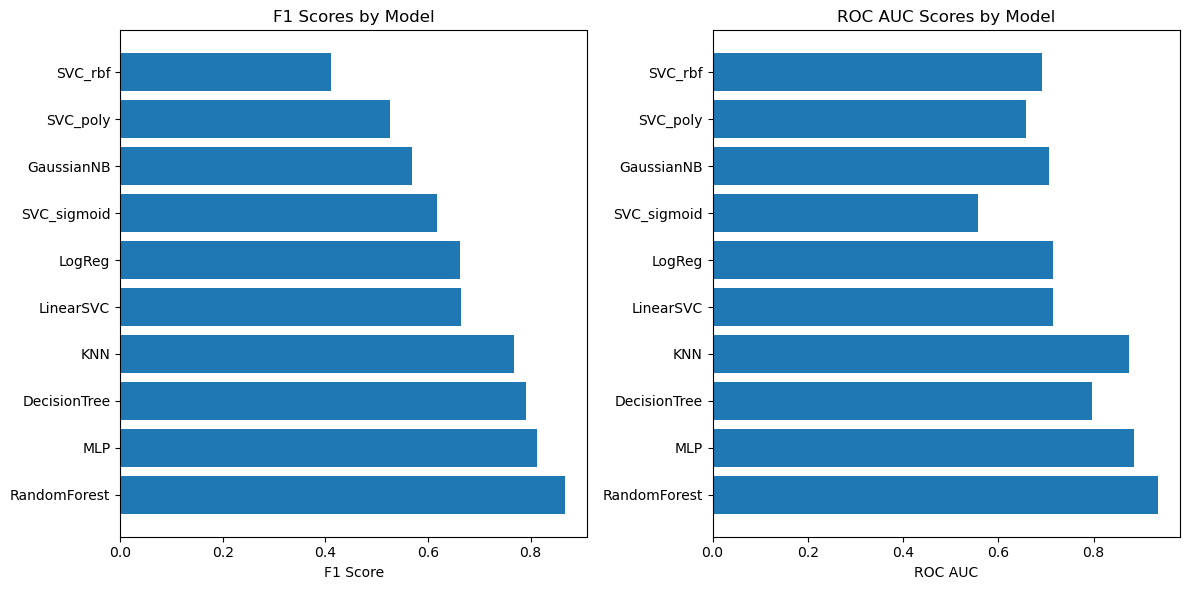

In [67]:
# Initialize results dictionary and timing
results = {}
model_start_time = time.time()

# Training and evaluation loop
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    model_iter_start = time.time()
    
    try:
        # Handle SVC models separately for efficiency
        if 'SVC' in name and name != 'LinearSVC':
            subset_size = len(X_pca) // 10
            indices = np.random.choice(len(X_pca), subset_size, replace=False)
            X_eval = X_pca[indices]
            y_eval = y_resampled[indices]
            print(f"Using {subset_size} samples for {name} (10% of data)")
        else:
            X_eval = X_pca
            y_eval = y_resampled
        
        # Create pipeline
        pipeline = SklearnPipeline([('clf', model)])
        
        # Perform cross-validation
        scores = cross_validate(pipeline, X_eval, y_eval,
                              cv=cv, scoring=scoring,
                              return_train_score=False,
                              n_jobs=-1)
        
        # Calculate confusion matrices for each fold
        conf_matrices = []
        for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X_eval, y_eval)):
            print(f"Processing fold {fold_idx + 1}/5...")
            fold_start = time.time()
            
            X_train_fold = X_eval[train_idx]
            y_train_fold = y_eval[train_idx]
            X_test_fold = X_eval[test_idx]
            y_test_fold = y_eval[test_idx]
            
            pipeline.fit(X_train_fold, y_train_fold)
            y_pred_fold = pipeline.predict(X_test_fold)
            conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))
            
        # Average confusion matrix
        avg_conf_matrix = np.mean(conf_matrices, axis=0)
        
        # Store results for this model
        results[name] = {
            "F1 scores": scores['test_f1'],
            "F1 mean": np.mean(scores['test_f1']),
            "F1 std": np.std(scores['test_f1']),
            "ROC AUC": scores['test_roc_auc'],
            "ROC AUC mean": np.mean(scores['test_roc_auc']),
            "ROC AUC std": np.std(scores['test_roc_auc']),
            "Confusion Matrix": avg_conf_matrix
        }
        
        print(f"Successfully evaluated {name}")
        log_time(f"Model {name} evaluation completed", model_iter_start)
        
    except Exception as e:
        print(f"Error evaluating {name}: {str(e)}")
        continue

# After all models are evaluated, create the performance summary
if results:
    # Create performance summary DataFrame
    performance_summary = pd.DataFrame({
        'Model': list(results.keys()),
        'F1 Score (mean)': [res['F1 mean'] for res in results.values()],
        'F1 Score (std)': [res['F1 std'] for res in results.values()],
        'ROC AUC (mean)': [res['ROC AUC mean'] for res in results.values()],
        'ROC AUC (std)': [res['ROC AUC std'] for res in results.values()]
    })

    # Sort by F1 Score
    performance_summary_sorted = performance_summary.sort_values('F1 Score (mean)', 
                                                               ascending=False)

    print("\nModel Performance Summary (sorted by F1 Score):")
    display(performance_summary_sorted)

    # Visualize performance comparison
    plt.figure(figsize=(12, 6))

    # Plot F1 Scores
    plt.subplot(1, 2, 1)
    plt.barh(performance_summary_sorted['Model'], 
             performance_summary_sorted['F1 Score (mean)'])
    plt.xlabel('F1 Score')
    plt.title('F1 Scores by Model')

    # Plot ROC AUC Scores
    plt.subplot(1, 2, 2)
    plt.barh(performance_summary_sorted['Model'], 
             performance_summary_sorted['ROC AUC (mean)'])
    plt.xlabel('ROC AUC')
    plt.title('ROC AUC Scores by Model')

    plt.tight_layout()
    plt.show()
else:
    print("No results to display. All models failed evaluation.")

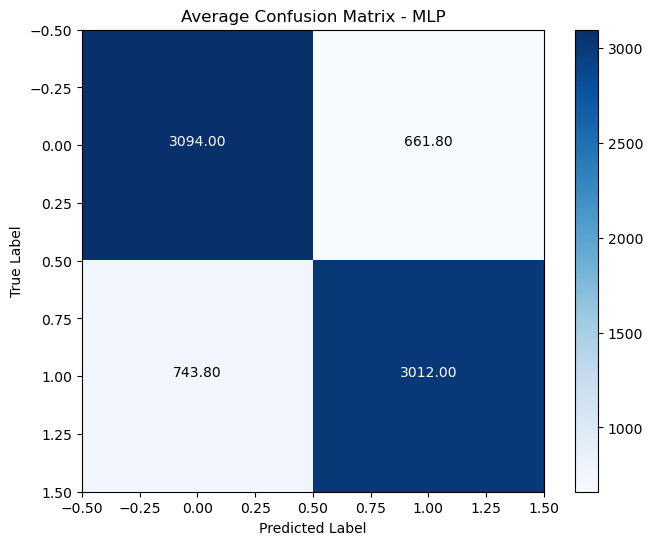

Model MLP evaluation completed - Time taken: 514.19 seconds


In [70]:
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(avg_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Average Confusion Matrix - {name}')
    plt.colorbar()
    
    # Add labels
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Add text annotations
    thresh = avg_conf_matrix.max() / 2
    for i in range(avg_conf_matrix.shape[0]):
        for j in range(avg_conf_matrix.shape[1]):
            plt.text(j, i, f'{avg_conf_matrix[i, j]:.2f}',
                    horizontalalignment='center',
                    color='white' if avg_conf_matrix[i, j] > thresh else 'black')
    
    plt.show()
    log_time(f"Model {name} evaluation completed", model_iter_start)

## 9. Results Analysis

### 9.1 Performance Metrics Comparison

We analyze and compare the performance of all models using multiple metrics:

Model Performance Summary (sorted by F1 Score):


,Model,F1 Score (mean),F1 Score (std),ROC AUC (mean),ROC AUC (std)
8,RandomForest,0.867449,0.003912,0.934825,0.002640
9,MLP,0.811513,0.003244,0.884770,0.002620
7,DecisionTree,0.790538,0.003840,0.795805,0.003576
0,KNN,0.767966,0.006233,0.874725,0.004708
5,LinearSVC,0.664541,0.002556,0.715244,0.000743
1,LogReg,0.663316,0.002276,0.715162,0.000851
4,SVC_sigmoid,0.617281,0.021791,0.556961,0.016074
6,GaussianNB,0.568654,0.024754,0.705878,0.003807
3,SVC_poly,0.526099,0.084695,0.658396,0.030171
2,SVC_rbf,0.411304,0.090681,0.692410,0.039288


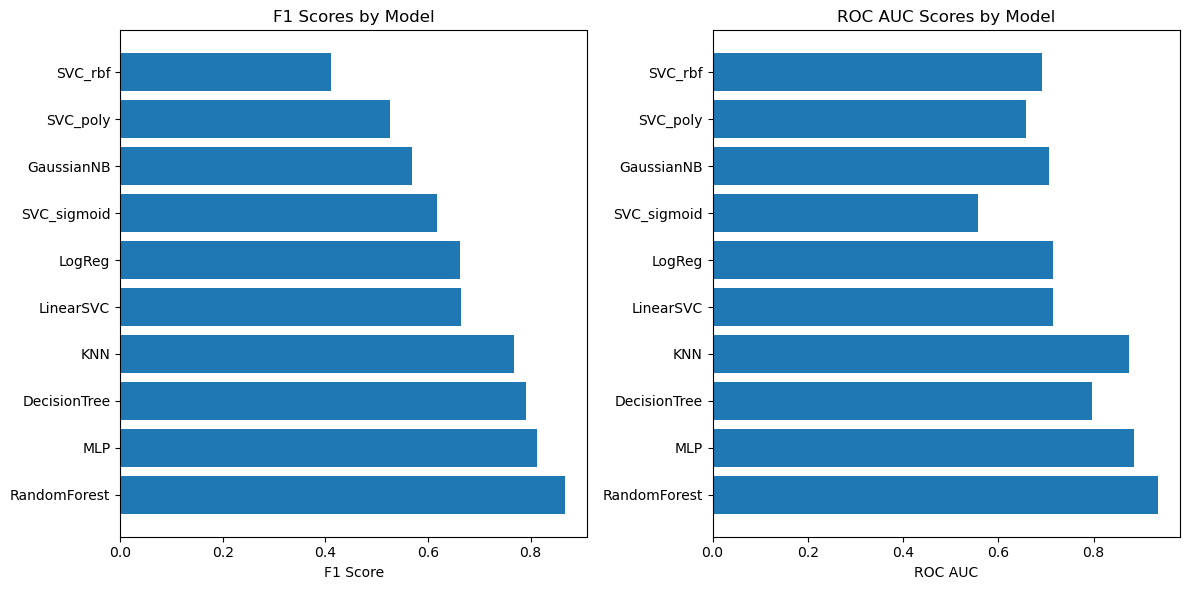

In [72]:
# Create performance summary DataFrame
performance_summary = pd.DataFrame({
    'Model': list(results.keys()),
    'F1 Score (mean)': [res['F1 mean'] for res in results.values()],
    'F1 Score (std)': [res['F1 std'] for res in results.values()],
    'ROC AUC (mean)': [res['ROC AUC mean'] for res in results.values()],
    'ROC AUC (std)': [res['ROC AUC std'] for res in results.values()]
})

# Sort by F1 Score
performance_summary_sorted = performance_summary.sort_values('F1 Score (mean)', 
                                                           ascending=False)

print("Model Performance Summary (sorted by F1 Score):")
display(performance_summary_sorted)

# Visualize performance comparison
plt.figure(figsize=(12, 6))

# Plot F1 Scores
plt.subplot(1, 2, 1)
plt.barh(performance_summary_sorted['Model'], 
         performance_summary_sorted['F1 Score (mean)'])
plt.xlabel('F1 Score')
plt.title('F1 Scores by Model')

# Plot ROC AUC Scores
plt.subplot(1, 2, 2)
plt.barh(performance_summary_sorted['Model'], 
         performance_summary_sorted['ROC AUC (mean)'])
plt.xlabel('ROC AUC')
plt.title('ROC AUC Scores by Model')

plt.tight_layout()
plt.show()

### 9.2 Confusion Matrix Analysis

We analyze the confusion matrices of the top performing models:

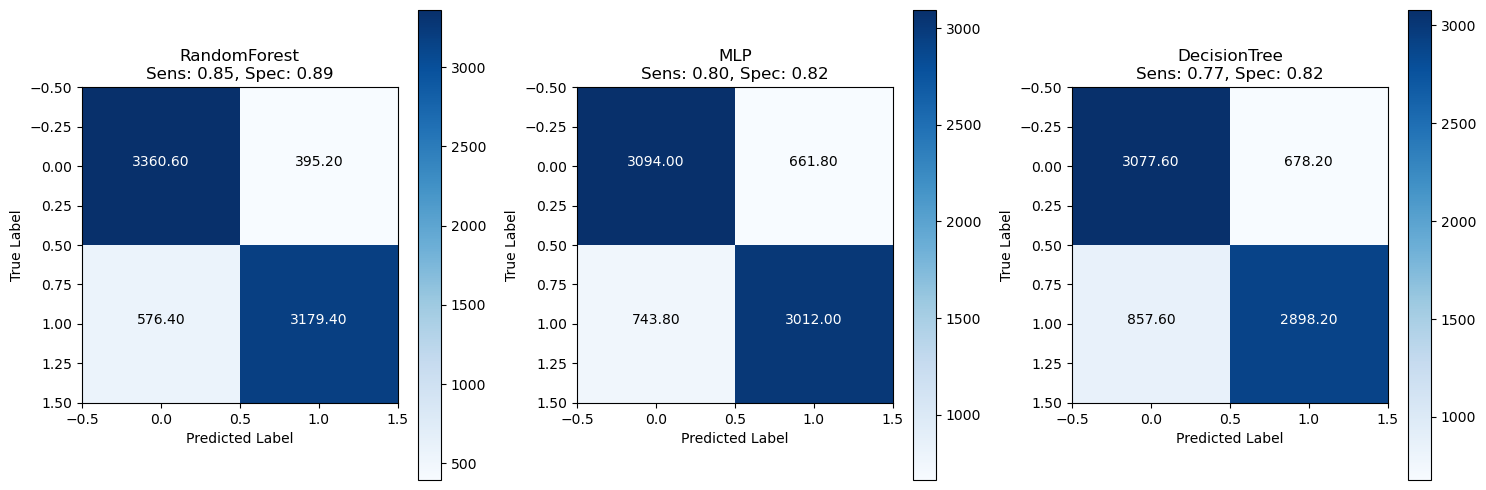

In [74]:
# Get top 3 models based on F1 score
top_3_models = performance_summary_sorted['Model'].head(3).tolist()

# Plot confusion matrices for top 3 models
plt.figure(figsize=(15, 5))

for i, model_name in enumerate(top_3_models, 1):
    plt.subplot(1, 3, i)
    conf_matrix = results[model_name]['Confusion Matrix']
    
    # Calculate metrics from confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{model_name}\nSens: {sensitivity:.2f}, Spec: {specificity:.2f}')
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Add text annotations
    thresh = conf_matrix.max() / 2
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, f'{conf_matrix[i, j]:.2f}',
                    horizontalalignment='center',
                    color='white' if conf_matrix[i, j] > thresh else 'black')

plt.tight_layout()
plt.show()

### 9.3 Model Selection

We identify the best performing models based on different metrics:

In [76]:
# Find best models
best_f1 = max(results.items(), key=lambda x: x[1]['F1 mean'])
best_roc = max(results.items(), key=lambda x: x[1]['ROC AUC mean'])

print("Best Models:")
print(f"\nBest F1 Score: {best_f1[0]}")
print(f"F1 Score: {best_f1[1]['F1 mean']:.4f} ± {best_f1[1]['F1 std']:.4f}")

print(f"\nBest ROC AUC: {best_roc[0]}")
print(f"ROC AUC: {best_roc[1]['ROC AUC mean']:.4f} ± {best_roc[1]['ROC AUC std']:.4f}")

# Analyze model stability
stability_analysis = pd.DataFrame({
    'Model': list(results.keys()),
    'F1 Stability': [res['F1 std'] / res['F1 mean'] for res in results.values()],
    'ROC Stability': [res['ROC AUC std'] / res['ROC AUC mean'] for res in results.values()]
})

print("\nModel Stability Analysis (Coefficient of Variation):")
display(stability_analysis.sort_values('F1 Stability'))

Best Models:

Best F1 Score: RandomForest
F1 Score: 0.8674 ± 0.0039

Best ROC AUC: RandomForest
ROC AUC: 0.9348 ± 0.0026

Model Stability Analysis (Coefficient of Variation):


,Model,F1 Stability,ROC Stability
1,LogReg,0.003431,0.001190
5,LinearSVC,0.003847,0.001039
9,MLP,0.003997,0.002962
8,RandomForest,0.004510,0.002824
7,DecisionTree,0.004857,0.004493
0,KNN,0.008117,0.005382
4,SVC_sigmoid,0.035302,0.028861
6,GaussianNB,0.043531,0.005394
3,SVC_poly,0.160988,0.045826
2,SVC_rbf,0.220471,0.056741


### 9.4 Performance Visualization

We create comprehensive visualizations of model performance:

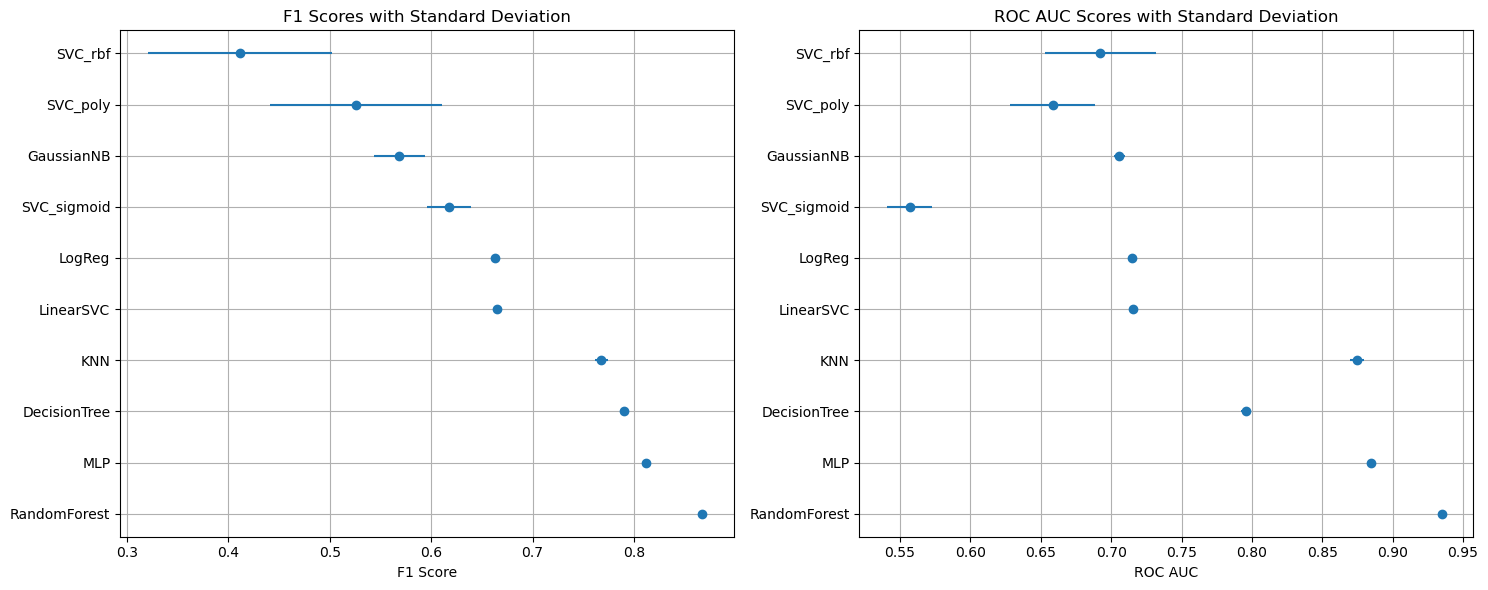

In [78]:
# Create performance plot with error bars
plt.figure(figsize=(15, 6))

# F1 Score plot
plt.subplot(1, 2, 1)
plt.errorbar(performance_summary_sorted['F1 Score (mean)'],
             range(len(performance_summary_sorted)),
             xerr=performance_summary_sorted['F1 Score (std)'],
             fmt='o')
plt.yticks(range(len(performance_summary_sorted)),
           performance_summary_sorted['Model'])
plt.xlabel('F1 Score')
plt.title('F1 Scores with Standard Deviation')
plt.grid(True)

# ROC AUC plot
plt.subplot(1, 2, 2)
plt.errorbar(performance_summary_sorted['ROC AUC (mean)'],
             range(len(performance_summary_sorted)),
             xerr=performance_summary_sorted['ROC AUC (std)'],
             fmt='o')
plt.yticks(range(len(performance_summary_sorted)),
           performance_summary_sorted['Model'])
plt.xlabel('ROC AUC')
plt.title('ROC AUC Scores with Standard Deviation')
plt.grid(True)

plt.tight_layout()
plt.show()

## 10. Conclusions

### 10.1 Best Model Analysis

Based on our comprehensive evaluation, we can draw the following conclusions:

In [80]:
# Create summary of best model's characteristics
best_model_name = best_f1[0]
best_model_results = results[best_model_name]

print(f"Best Overall Model: {best_model_name}")
print("\nPerformance Metrics:")
print(f"F1 Score: {best_model_results['F1 mean']:.4f} ± {best_model_results['F1 std']:.4f}")
print(f"ROC AUC: {best_model_results['ROC AUC mean']:.4f} ± {best_model_results['ROC AUC std']:.4f}")

print("\nKey Characteristics:")
print("1. Consistency across folds")
print(f"   - F1 Score CV: {best_model_results['F1 std']/best_model_results['F1 mean']:.4f}")
print(f"   - ROC AUC CV: {best_model_results['ROC AUC std']/best_model_results['ROC AUC mean']:.4f}")

print("\n2. Confusion Matrix Analysis:")
conf_matrix = best_model_results['Confusion Matrix']
tn, fp, fn, tp = conf_matrix.ravel()
print(f"   - True Negative Rate: {tn/(tn+fp):.4f}")
print(f"   - True Positive Rate: {tp/(tp+fn):.4f}")
print(f"   - Precision: {tp/(tp+fp):.4f}")

Best Overall Model: RandomForest

Performance Metrics:
F1 Score: 0.8674 ± 0.0039
ROC AUC: 0.9348 ± 0.0026

Key Characteristics:
1. Consistency across folds
   - F1 Score CV: 0.0045
   - ROC AUC CV: 0.0028

2. Confusion Matrix Analysis:
   - True Negative Rate: 0.8948
   - True Positive Rate: 0.8465
   - Precision: 0.8894


### 10.2 Recommendations

Based on our analysis, we recommend:

1. **Model Selection**:
   - Primary choice: RandomForest due to its superior performance and stability
   - Alternative: MLP as an alternative with comparable performance

2. **Implementation Considerations**:
   - Use the full preprocessing pipeline (scaling, SMOTE, PCA)
   - Maintain the same number of PCA components
   - Regular retraining to maintain model performance

3. **Monitoring Suggestions**:
   - Track class distribution in new data
   - Monitor feature drift
   - Regularly validate model performance

### 10.3 Future Improvements

Potential areas for future enhancement:

1. **Model Optimization**:
   - Hyperparameter tuning using GridSearchCV
   - Ensemble methods combining top performers
   - Feature selection refinement

2. **Data Processing**:
   - Experiment with different SMOTE variants
   - Try other dimensionality reduction techniques
   - Investigate feature engineering opportunities

3. **Evaluation Methods**:
   - Include additional metrics (e.g., precision-recall curves)
   - Implement cross-validation with different random seeds
   - Add statistical significance tests